## Imports

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , f1_score
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
DATASET_DIR = '../../Dataset/body_level_classification_train.csv'
df = pd.read_csv(DATASET_DIR)

## Data Preprocessing

In [3]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [4]:

df['Gender'] = pd.factorize(df['Gender'])[0]
df['H_Cal_Consump'] = pd.factorize(df['H_Cal_Consump'])[0]
df['Alcohol_Consump'] = pd.factorize(df['Alcohol_Consump'])[0]
df['Smoking'] = pd.factorize(df['Smoking'])[0]
df['Food_Between_Meals'] = pd.factorize(df['Food_Between_Meals'])[0]
df['Fam_Hist'] = pd.factorize(df['Fam_Hist'])[0]
df['H_Cal_Burn'] = pd.factorize(df['H_Cal_Burn'])[0]
df['Transport'] = pd.factorize(df['Transport'])[0]


In [5]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,0,22.547298,1.722461,51.881263,0,2.663421,1.041110,0,0,3.000000,0,0,0,0.794402,1.391948,0,Body Level 1
1,1,19.799054,1.743702,54.927529,0,2.000000,2.847264,1,0,3.289260,1,0,0,1.680844,2.000000,0,Body Level 1
2,0,17.823438,1.708406,50.000000,0,1.642241,1.099231,1,0,3.452590,1,1,0,0.418875,1.000000,0,Body Level 1
3,0,19.007177,1.690727,49.895716,0,1.212908,1.029703,1,0,3.207071,1,1,0,2.000000,1.000000,0,Body Level 1
4,1,19.729250,1.793315,58.195150,0,2.508835,2.076933,0,0,3.435905,1,0,0,2.026668,1.443328,1,Body Level 1


## Data Analysis

In [6]:
# count number of every class in body level
df['Body_Level'].value_counts()


Body Level 4    680
Body Level 3    406
Body Level 2    201
Body Level 1    190
Name: Body_Level, dtype: int64

In [10]:
# # solve class imbalance problem
# df1 = df[df['Body_Level'] == 'Body Level 1']
# df2 = df[df['Body_Level'] == 'Body Level 2']
# df3 = df[df['Body_Level'] == 'Body Level 3']
# df4 = df[df['Body_Level'] == 'Body Level 4']

# print(df1.shape)
# print(df2.shape)
# print(df3.shape)
# print(df4.shape)


# max_size = df['Body_Level'].value_counts().max()
# print(max_size)

# if max_size-df1.shape[0] > 0:
#     df1_to_add = df1.sample(max_size - df1.shape[0])
#     df1 = df1.append(df1_to_add)
    
# if max_size-df2.shape[0] > 0:
#     df2_to_add = df2.sample(max_size - df2.shape[0])
#     df2 = df2.append(df2_to_add)

# if max_size-df3.shape[0] > 0:    
#     df3_to_add = df3.sample(max_size - df3.shape[0])
#     df3 = df3.append(df3_to_add)
    
# if max_size-df4.shape[0] > 0:
#     df4_to_add = df4.sample(max_size - df4.shape[0])
#     df4 = df4.append(df4_to_add)

# df = df1.append(df2)
# df = df.append(df3)
# df = df.append(df4)

# df['Body_Level'].value_counts()






(190, 17)
(201, 17)
(406, 17)
(680, 17)
680


ValueError: Cannot take a larger sample than population when 'replace=False'

## Feature Extraction

In [ ]:
y = df['Body_Level']
X = df.drop(['Body_Level'], axis=1)
print(X.shape)
print(y.shape)

(1477, 16)
(1477,)


## Data Splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1181, 16)
(1181,)
(296, 16)
(296,)


## Model Training

In [ ]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

## Evaluation

Accuracy:  0.9087837837837838


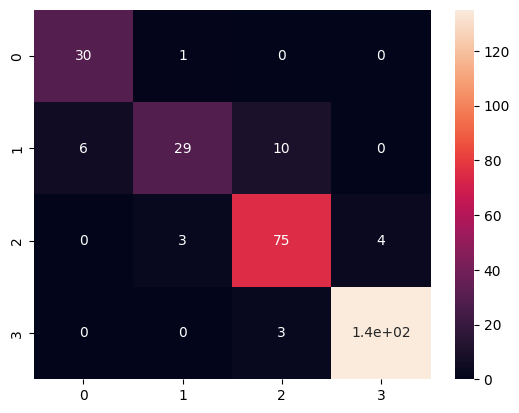

              precision    recall  f1-score   support

Body Level 1       0.83      0.97      0.90        31
Body Level 2       0.88      0.64      0.74        45
Body Level 3       0.85      0.91      0.88        82
Body Level 4       0.97      0.98      0.97       138

    accuracy                           0.91       296
   macro avg       0.88      0.88      0.87       296
weighted avg       0.91      0.91      0.91       296

F1 Score:  0.905703746780139


In [ ]:
y_pred = model.predict(x_test)

# Accuracy Score
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# weighted F1-score
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))